In [263]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClass
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.image import imread
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, auc, plot_roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,roc_auc_score, balanced_accuracy_score,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.metrics import plot_confusion_matrix
import pickle

pd.set_option('display.max_columns', 500)
sns.set()

sns.set_style('darkgrid')

In [264]:
df = pd.read_csv('Customer-Churn.csv')

In [265]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [266]:
train,test = train_test_split(df,test_size=0.2,random_state=123)

In [267]:
#A1
train.reset_index(drop=True, inplace=True)

In [268]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6457-GIRWB,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
1,5115-GZDEL,Male,0,No,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),67.20,4671.7,No
2,3398-ZOUAA,Male,1,Yes,No,21,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.10,1474.75,Yes
3,7011-CVEUC,Male,0,Yes,No,25,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.70,2338.35,No
4,3836-FZSDJ,Male,1,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.85,1901,No


In [269]:
print(train.shape)
print(test.shape)
print(df.shape)

(5634, 21)
(1409, 21)
(7043, 21)


In [270]:
train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [271]:
#A2
train.drop(['customerID'],axis=1,inplace=True)

In [272]:
train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [273]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
1,Male,0,No,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),67.20,4671.7,No
2,Male,1,Yes,No,21,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.10,1474.75,Yes
3,Male,0,Yes,No,25,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.70,2338.35,No
4,Male,1,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.85,1901,No


In [274]:
train['TotalCharges'].unique()

array(['69.35', '4671.7', '1474.75', ..., '3409.1', '1258.6', '232.35'],
      dtype=object)

In [275]:
train[train['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1343,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2371,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
3880,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
4054,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
4189,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
5039,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5528,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
5629,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


In [276]:
for i in train['TotalCharges'].values:
    if i == ' ':
        train['TotalCharges'] = train['TotalCharges'].apply(lambda x:x )

In [277]:
#A3
train['TotalCharges'] = train['TotalCharges'].replace(' ',np.nan) 

In [278]:
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [279]:
#A4
train['TotalCharges'] = train['TotalCharges'].astype(float)

In [280]:
from sklearn.impute import SimpleImputer,KNNImputer

In [281]:
cat = []
for i in train.columns:
    if train[i].dtype == 'O':
        cat.append(i)

In [282]:
print(cat)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [283]:
train.duplicated().sum()

14

In [284]:
#A5
train.drop_duplicates(inplace=True,keep='first',ignore_index=True)

In [285]:
train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
1,Male,0,No,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),67.20,4671.70,No
2,Male,1,Yes,No,21,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.10,1474.75,Yes
3,Male,0,Yes,No,25,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.70,2338.35,No
4,Male,1,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.85,1901.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
5616,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,No,Yes,No,No,Yes,Two year,No,Credit card (automatic),63.35,3409.10,No
5617,Female,0,Yes,Yes,14,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,87.25,1258.60,Yes
5618,Female,1,Yes,Yes,29,No,No phone service,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,35.65,1025.15,No


In [286]:
#A6
train = train.dropna().reset_index(drop=True)

In [287]:
for i in cat:
    if train[i].dtype == 'O':
        print(f'{i} has {train[i].nunique()} categories\nThey are: \n{train[i].unique()}\n')

gender has 2 categories
They are: 
['Male' 'Female']

Partner has 2 categories
They are: 
['No' 'Yes']

Dependents has 2 categories
They are: 
['No' 'Yes']

PhoneService has 2 categories
They are: 
['Yes' 'No']

MultipleLines has 3 categories
They are: 
['No' 'No phone service' 'Yes']

InternetService has 3 categories
They are: 
['Fiber optic' 'DSL' 'No']

OnlineSecurity has 3 categories
They are: 
['No' 'Yes' 'No internet service']

OnlineBackup has 3 categories
They are: 
['No' 'Yes' 'No internet service']

DeviceProtection has 3 categories
They are: 
['No' 'Yes' 'No internet service']

TechSupport has 3 categories
They are: 
['No' 'Yes' 'No internet service']

StreamingTV has 3 categories
They are: 
['No' 'Yes' 'No internet service']

StreamingMovies has 3 categories
They are: 
['No' 'Yes' 'No internet service']

Contract has 3 categories
They are: 
['Month-to-month' 'Two year' 'One year']

PaperlessBilling has 2 categories
They are: 
['Yes' 'No']

PaymentMethod has 4 categories
The

In [288]:
#for i in cat:
    #if train[i].dtype == 'O':
        #train[i] = pd.Categorical(train[i]).codes

In [289]:
#imp = KNNImputer(n_neighbors=3)

#train_imp = pd.DataFrame(imp.fit_transform(train),columns=train.columns)

In [290]:
#for i in cat:
#        train[i] = pd.Categorical.from_codes(train_imp[i],train[i].cat.categories)

In [291]:
col = train.columns

In [292]:
#A7
X_train = train.drop(['Churn'],axis=1)
y_train = train['Churn']

In [293]:
cat1 = []
for i in X_train.columns:
    if X_train[i].dtype == 'O':
        cat1.append(i)

In [294]:
#A8
encoder =  OneHotEncoder(drop='first',dtype=int)
enc_data =pd.DataFrame(encoder.fit_transform(X_train[cat1]).toarray())
#enc_data.columns = encoder.get_feature_names_out()
enc_data.columns = encoder.get_feature_names(cat1)
X_train = X_train.join(enc_data)

X_train.drop(cat1,axis=1,inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [295]:
col1 = X_train.columns

In [296]:
#A9
scaler =  MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=col1)

<AxesSubplot:>

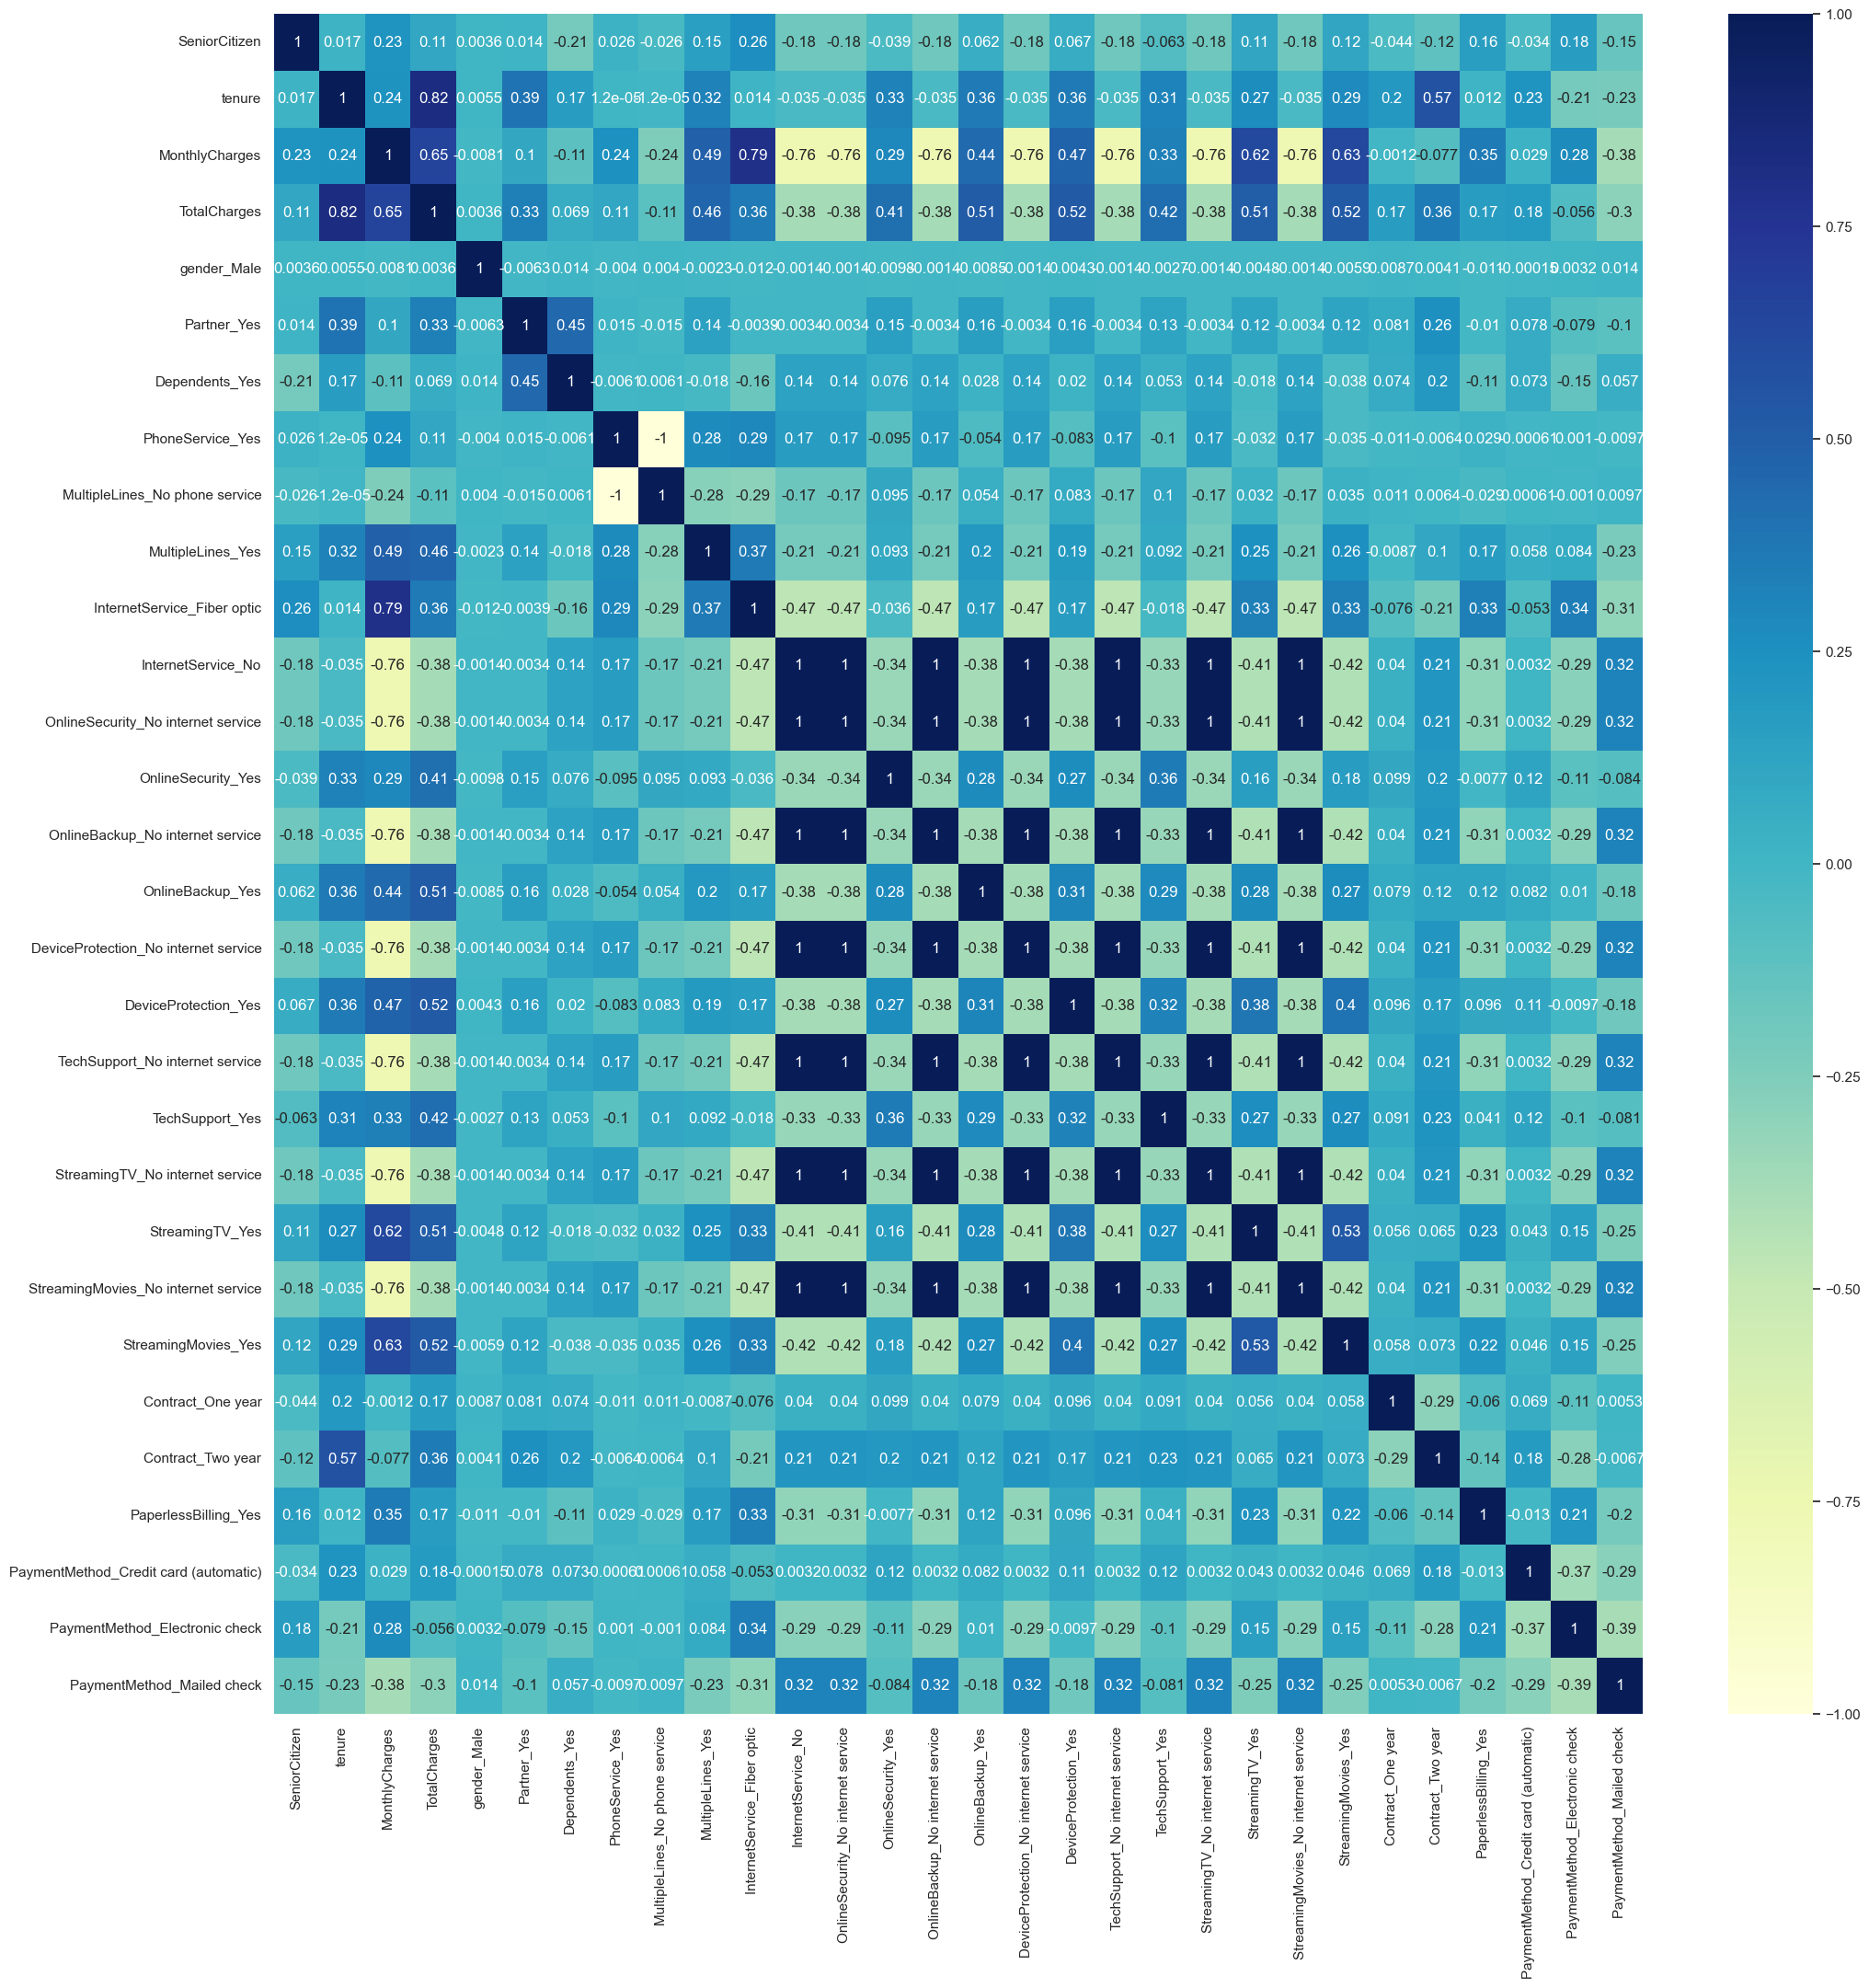

In [297]:
plt.figure(figsize =(24,24))
cors = X_train.corr()
sns.heatmap(cors,annot=True,cmap='YlGnBu')

<AxesSubplot:>

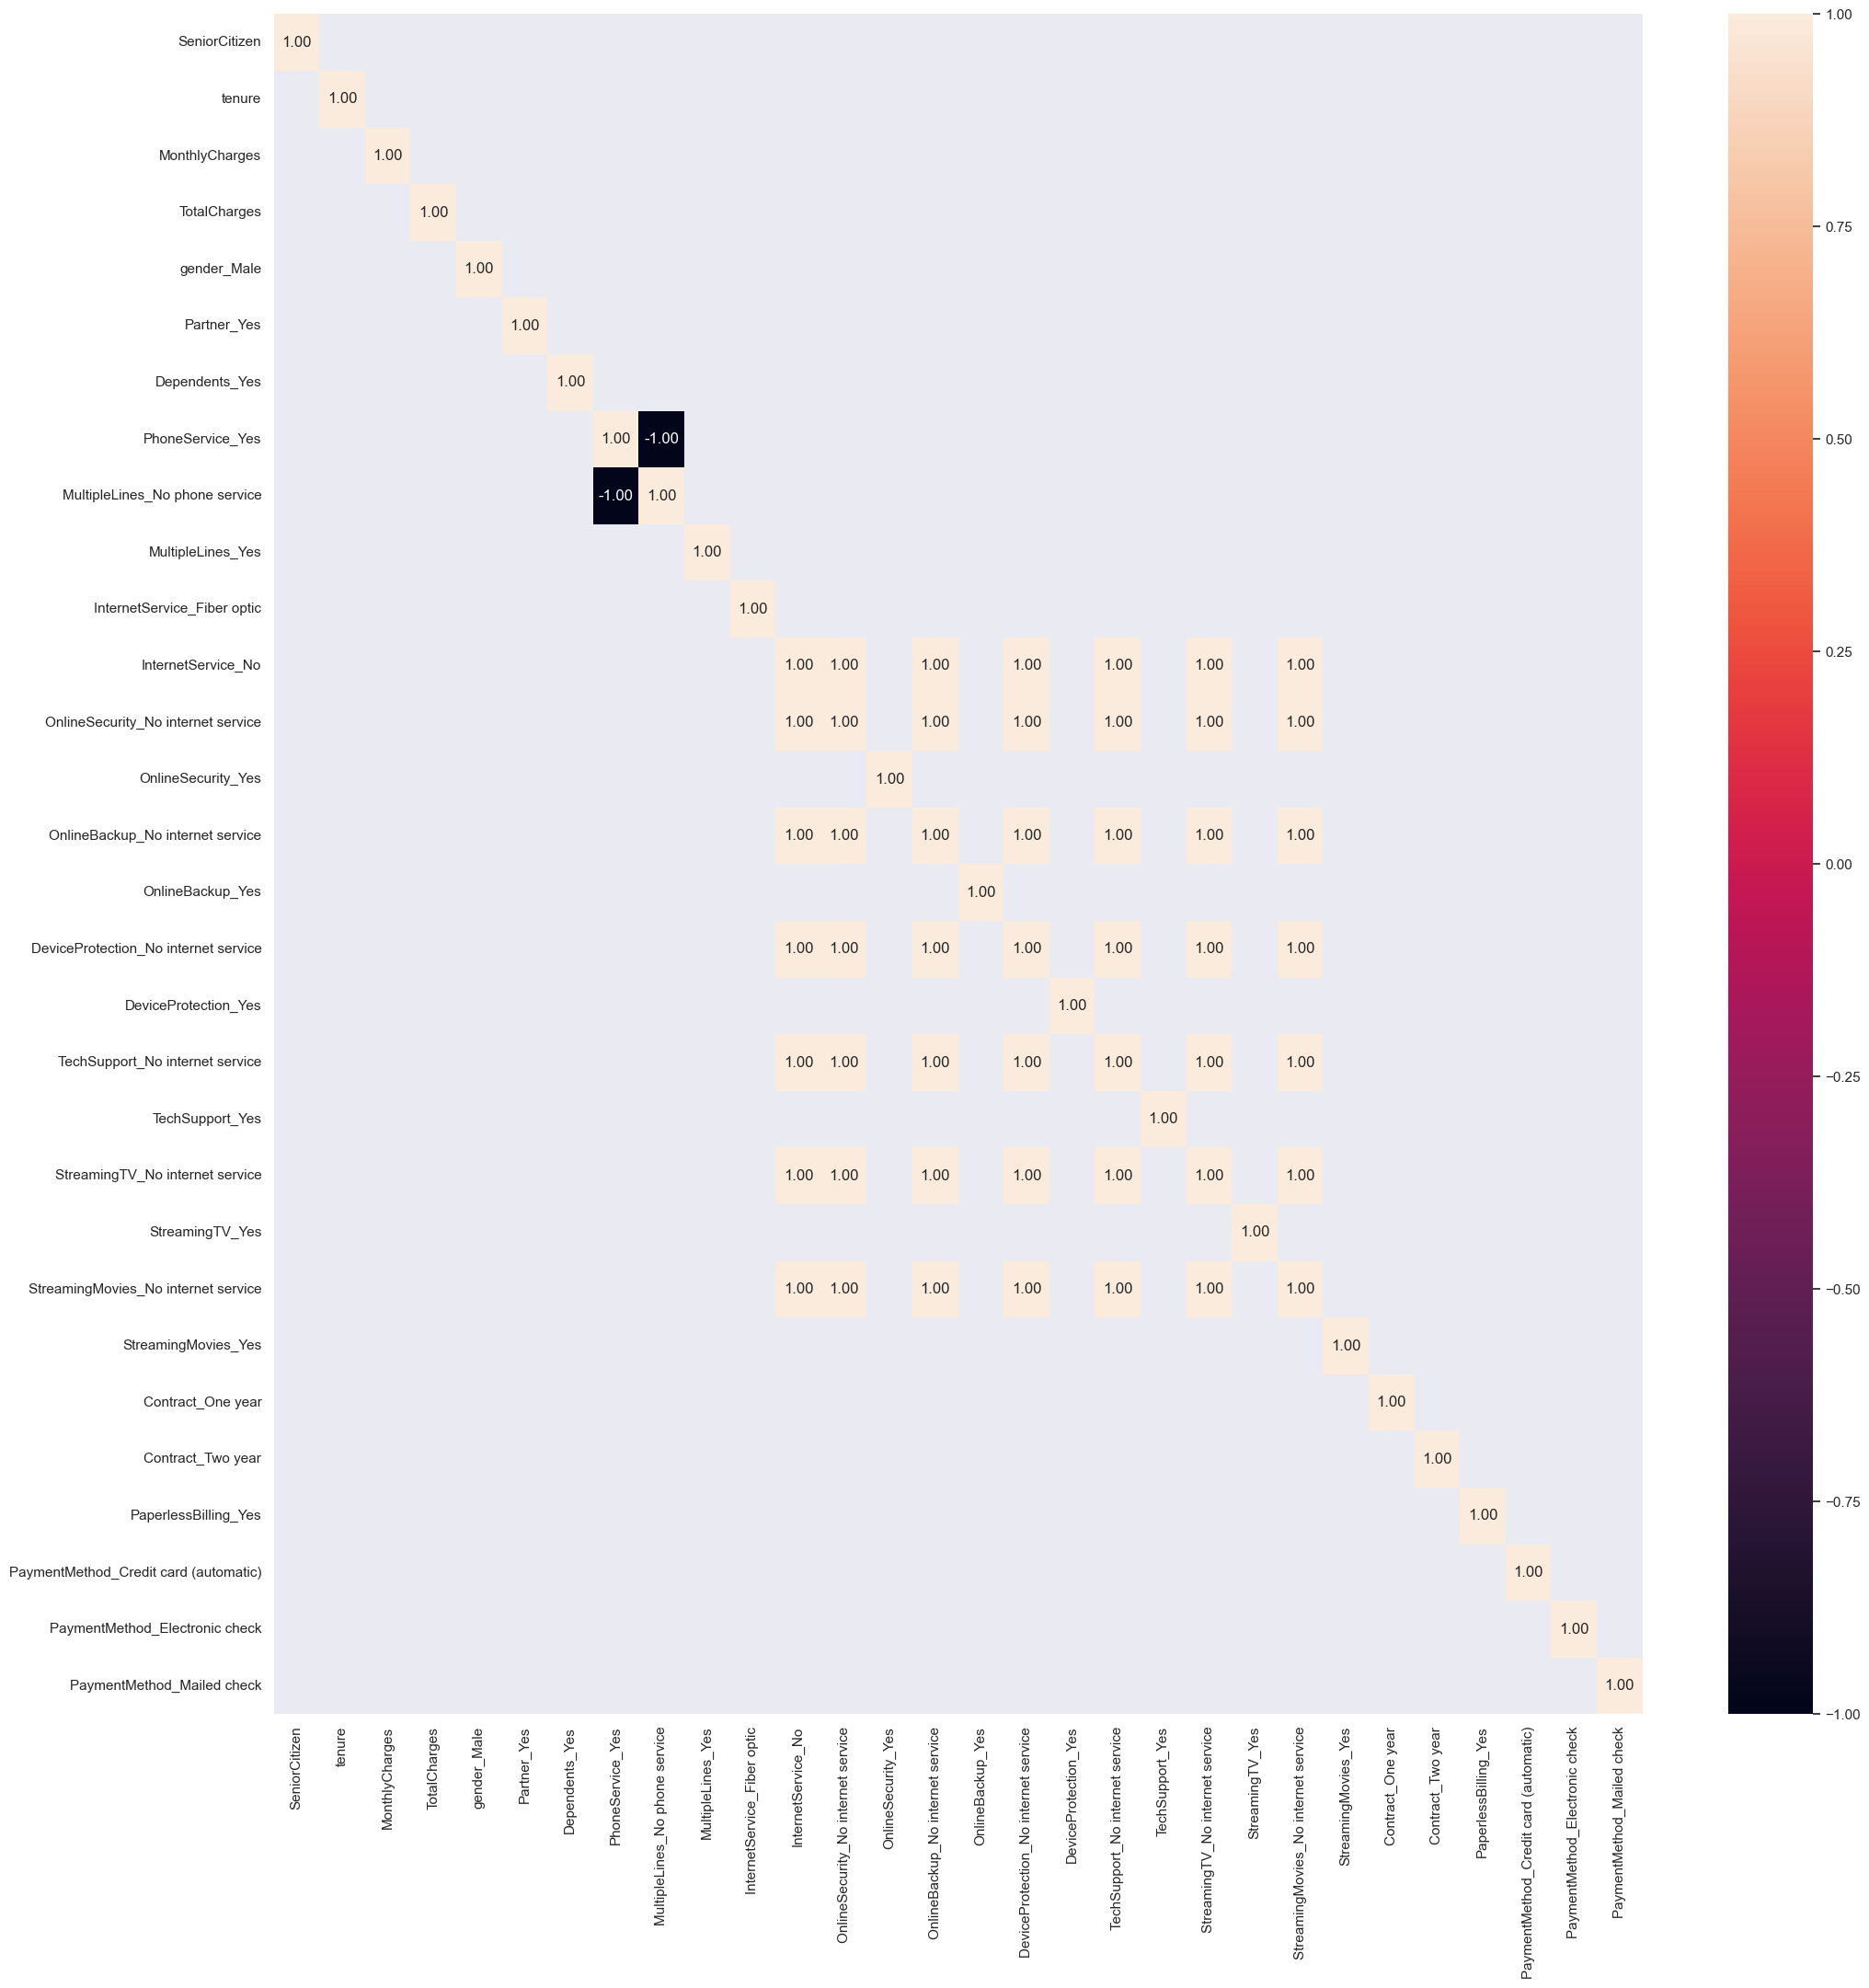

In [298]:
mask = cors[(cors >= 0.85) | (cors <= -0.85)]

plt.figure(figsize=(24,24))
sns.heatmap(mask, vmin=-1,vmax=1, annot=True, fmt='0.2f')

chi square for categorical variable


In [299]:
dt = DecisionTreeClassifier(max_depth= 10)
dt.fit(X_train,y_train)
predictors = col1

coef = pd.Series(dt.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
tenure,0.274498
InternetService_Fiber optic,0.191853
TotalCharges,0.144661
MonthlyCharges,0.127774
Contract_Two year,0.033952
Contract_One year,0.024596
PaperlessBilling_Yes,0.019511
PaymentMethod_Electronic check,0.019270
OnlineSecurity_Yes,0.017886
Partner_Yes,0.017733


In [300]:
def prepare(df):
    df.reset_index(drop=True, inplace=True)
    df.drop(['customerID'],axis=1,inplace=True)
    df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df.drop_duplicates(inplace=True,keep='first',ignore_index=True)
    df = df.dropna().reset_index(drop=True)
    X_test = df.drop(['Churn'],axis=1)
    y_test = df['Churn']
    cat1 = []
    for i in X_test.columns:
        if X_test[i].dtype == 'O':
            cat1.append(i)
    enc_data =pd.DataFrame(encoder.transform(X_test[cat1]).toarray())
    #enc_data.columns = encoder.get_feature_names_out()
    enc_data.columns = encoder.get_feature_names(cat1)
    X_test = X_test.join(enc_data)

    X_test.drop(cat1,axis=1,inplace=True)
    col1 = X_test.columns
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test,columns=col1)
    return X_test, y_test
    

In [301]:
X_test, y_test = prepare(test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [302]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsClassifier()
    return model

In [303]:
def performance(model,X_train,y_train,X_test, y_test):
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = [x[1] for x in y_pred_prob]

    disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Fully-Paid','Default'])

    print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
    print("\n Classification Report : \n",classification_report(y_test, y_pred))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, X_test, y_test)
    plt.show()


 Accuracy Score : 
  0.8079658605974396

 AUC Score : 
 0.85074160831444

 Confusion Matrix : 
  [[916  96]
 [174 220]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.84      0.91      0.87      1012
         Yes       0.70      0.56      0.62       394

    accuracy                           0.81      1406
   macro avg       0.77      0.73      0.75      1406
weighted avg       0.80      0.81      0.80      1406


 ROC curve : 



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


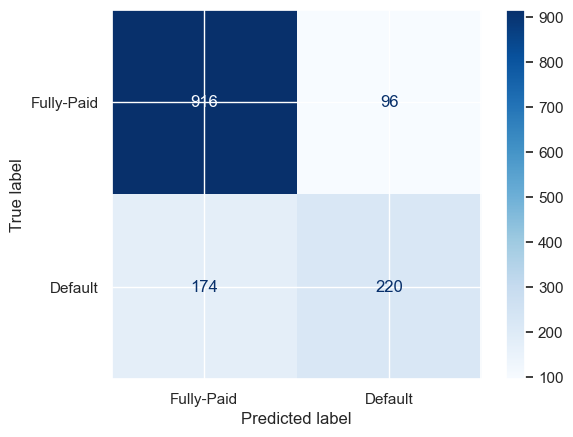

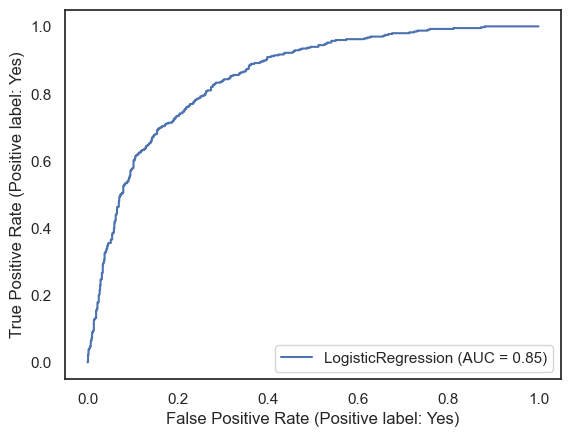

In [304]:
model1 = model_to_use('LR')
model1.fit(X_train,y_train)
performance(model1,X_train,y_train,X_test,y_test)
#plot_confusion_matrix(model1, X_test, y_test)

In [305]:
from imblearn.over_sampling import RandomOverSampler

In [306]:
ros = RandomOverSampler()
X_ros,y_ros  = ros.fit_resample(X_train,y_train)


 Accuracy Score : 
  0.8079658605974396

 AUC Score : 
 0.85074160831444

 Confusion Matrix : 
  [[916  96]
 [174 220]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.84      0.91      0.87      1012
         Yes       0.70      0.56      0.62       394

    accuracy                           0.81      1406
   macro avg       0.77      0.73      0.75      1406
weighted avg       0.80      0.81      0.80      1406


 ROC curve : 



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


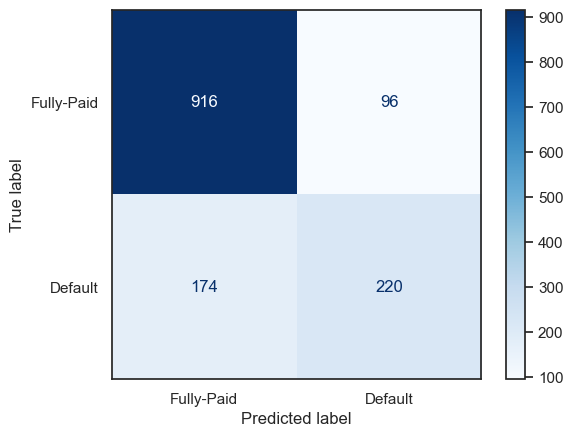

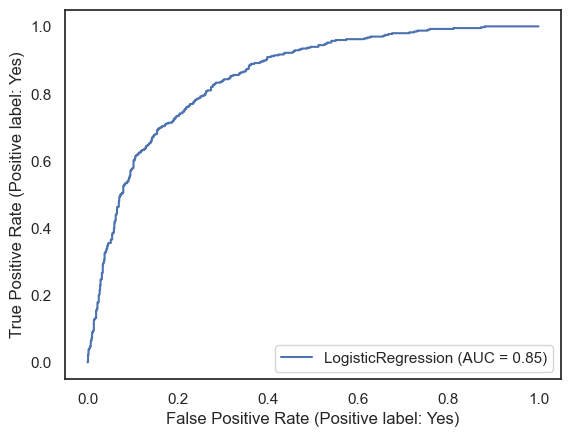

In [307]:
model1 = model_to_use('LR')
model1.fit(X_train,y_train)
performance(model1,X_ros,y_ros,X_test,y_test)
#plot_confusion_matrix(model1, X_test, y_test)


 Accuracy Score : 
  0.7261735419630156

 AUC Score : 
 0.6584087397925404

 Confusion Matrix : 
  [[825 187]
 [198 196]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.81      0.82      0.81      1012
         Yes       0.51      0.50      0.50       394

    accuracy                           0.73      1406
   macro avg       0.66      0.66      0.66      1406
weighted avg       0.72      0.73      0.72      1406


 ROC curve : 



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


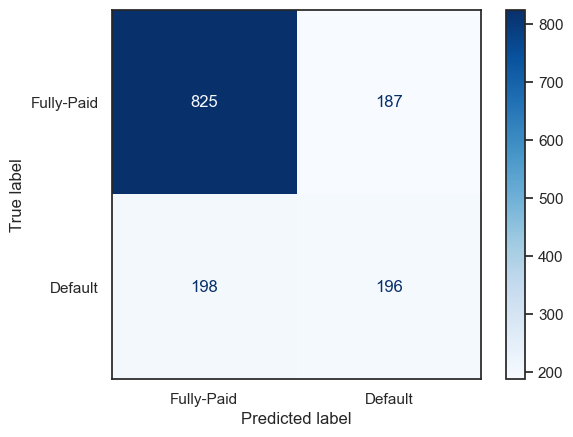

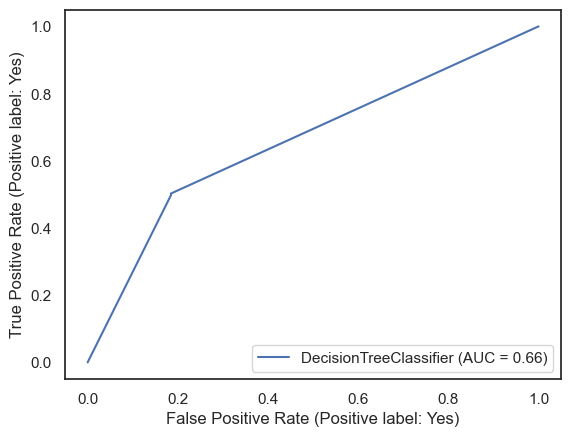

In [308]:
model3 = model_to_use('DT')
model3.fit(X_train,y_train)
performance(model3,X_ros,y_ros,X_test,y_test)
#plot_confusion_matrix(model1, X_test, y_test)


 Accuracy Score : 
  0.786628733997155

 AUC Score : 
 0.835569611364138

 Confusion Matrix : 
  [[922  90]
 [210 184]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.81      0.91      0.86      1012
         Yes       0.67      0.47      0.55       394

    accuracy                           0.79      1406
   macro avg       0.74      0.69      0.71      1406
weighted avg       0.77      0.79      0.77      1406


 ROC curve : 



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


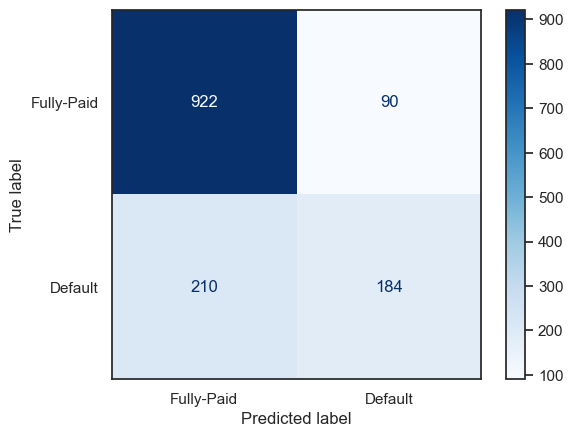

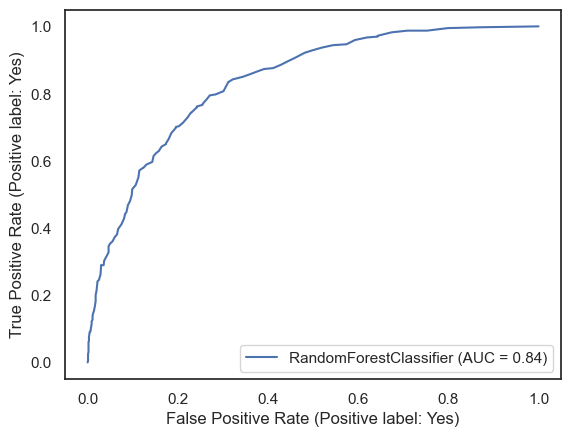

In [309]:
model4 = model_to_use('RF')
model4.fit(X_train,y_train)
performance(model4,X_ros,y_ros,X_test,y_test)
#plot_confusion_matrix(model1, X_test, y_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`


 Accuracy Score : 
  0.7652916073968705

 AUC Score : 
 0.7865010734134548

 Confusion Matrix : 
  [[880 132]
 [198 196]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.82      0.87      0.84      1012
         Yes       0.60      0.50      0.54       394

    accuracy                           0.77      1406
   macro avg       0.71      0.68      0.69      1406
weighted avg       0.76      0.77      0.76      1406


 ROC curve : 



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


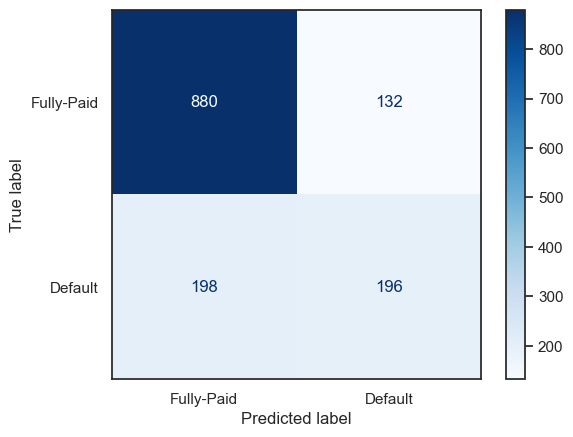

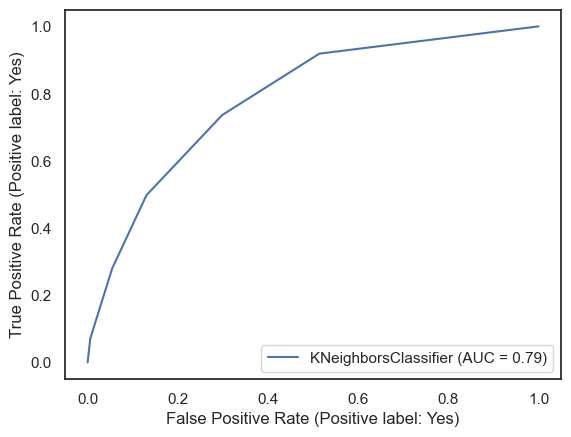

In [310]:
model5 = model_to_use('KNN')
model5.fit(X_train,y_train)
performance(model5,X_ros,y_ros,X_test,y_test)
#plot_confusion_matrix(model1, X_test, y_test)

In [311]:
test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,Yes,13,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.15,382.20,No
1,Female,0,No,No,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.30,797.10,No
2,Female,0,Yes,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25,No
3,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.35,3161.40,No
4,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,77.15,77.15,Yes
1405,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.30,19.30,Yes
1406,Male,0,No,No,6,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.35,489.45,Yes
1407,Male,0,Yes,Yes,66,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),54.65,3632.00,No


In [312]:
new_data = df.drop(['Churn'],axis= 1)

In [313]:
new_data.to_csv('new_data.csv',index=False)

In [314]:
new_data1 = new_data.copy()

In [315]:
def prep(df):
    df.reset_index(drop=True, inplace=True)
    df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df.drop_duplicates(inplace=True,keep='first',ignore_index=True)
    df = df.dropna().reset_index(drop=True)
    cust = df['customerID']
    df.drop(['customerID'],axis=1,inplace=True)
    #df = df.drop(['Churn'],axis=1)
    #y_test = df['Churn']
    cat1 = []
    for i in df.columns:
        if df[i].dtype == 'O':
            cat1.append(i)
    enc_data =pd.DataFrame(encoder.transform(df[cat1]).toarray())
    #enc_data.columns = encoder.get_feature_names_out()
    enc_data.columns = encoder.get_feature_names_out()
    df = df.join(enc_data)

    df.drop(cat1,axis=1,inplace=True)
    col1 = df.columns
    #scaler =  MinMaxScaler()
    df = scaler.transform(df)
    df = pd.DataFrame(df,columns=col1)
    return cust, df
    

In [316]:
cust , c_data = prep(new_data1)

In [317]:
c_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [318]:
new_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6


In [319]:
pred = model4.predict(c_data)
pred

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [320]:
results = pd.DataFrame({'Cust_ID':cust,'Churn_pred':pred})

In [321]:
results

,Cust_ID,Churn_pred
0,7590-VHVEG,No
1,5575-GNVDE,No
2,3668-QPYBK,Yes
3,7795-CFOCW,No
4,9237-HQITU,Yes
...,...,...
7027,6840-RESVB,No
7028,2234-XADUH,No
7029,4801-JZAZL,No
7030,8361-LTMKD,Yes


In [322]:
targ_cust = results[results['Churn_pred'] == 'Yes'].reset_index(drop=True)['Cust_ID']

In [323]:
targ_cust.to_frame()

,Cust_ID
0,3668-QPYBK
1,9237-HQITU
2,9305-CDSKC
3,7892-POOKP
4,0280-XJGEX
...,...
1750,1699-HPSBG
1751,8775-CEBBJ
1752,2235-DWLJU
1753,6894-LFHLY


In [324]:
#import pickle
from pickle import dump
#save the model
dump(model3, open('RF_class_model.pkl','wb'))

#save encoder
dump(encoder, open('enc_class.pkl', 'wb'))

#save scaler
dump(scaler, open ('scal_class.pkl', "wb"))

In [325]:
%%writefile churn.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle

model = pickle.load(open('RF_class_model.pkl','rb'))
scaler = pickle.load(open('scal_class.pkl', 'rb'))
encoder = pickle.load(open ('enc_class.pkl', "rb"))

df = st.file_uploader('upload a csv',type='csv')


#if(not df):
   # st.info('The prediction will begin, once you upload your data set')
   # st.stop()
    
if df is not None:
    #read csv file into a dataframe
    df = pd.read_csv(df)
else:
    st.stop()

def prep(df):
    #df.reset_index(drop=True, inplace=True)
    df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df.drop_duplicates(inplace=True,keep='first',ignore_index=True)
    df = df.dropna().reset_index(drop=True)
    cust = df['customerID']
    df.drop(['customerID'],axis=1,inplace=True)
    #df = df.drop(['Churn'],axis=1)
    #y_test = df['Churn']
    cat1 = []
    for i in df.columns:
        if df[i].dtype == 'O':
            cat1.append(i)
    enc_data =pd.DataFrame(encoder.transform(df[cat1]).toarray())
    #enc_data.columns = encoder.get_feature_names_out()
    enc_data.columns = encoder.get_feature_names(cat1)
    df = df.join(enc_data)

    df.drop(cat1,axis=1,inplace=True)
    col1 = df.columns
    df = scaler.transform(df)
    df = pd.DataFrame(df,columns=col1)
    return cust, df

cust , c_data = prep(df)
pred = model.predict(c_data)
results = pd.DataFrame({'Cust_ID':cust,'Churn_pred':pred})
targ_cust = results[results['Churn_pred'] == 'Yes'].reset_index(drop=True)['Cust_ID']

c1,c2 = st.columns(2)

with c1:
    if st.button('Prediction'):
        st.dataframe(results)
        csv1 = results.to_csv(index=False)
        st.download_button('Download Predictions', csv1,file_name='predictions.csv')
        
with c2:
    if st.button('Churn Customers'):
        st.dataframe(targ_cust)
        csv2 = targ_cust.to_csv(index=False)
        st.download_button('Download Target customer list',csv2, file_name = 'churn_cust.csv')
    

Overwriting churn.py
